# Data Exploration


Given our prepared dataset from the previous data scrapping and processing, we will now need to explore the data's relationship with the tag. 

Exploring the following relationships:
1. Length and Tag in
    a. subject
    b. body
2. Word Frequency, Std, and Tag in the body of the email

## Import Data

In [1]:
#pandas
import pandas as pd
from pandas import Series, DataFrame
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load data
train = pd.read_csv("./Data/Total_Data.csv", sep = ',')


    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wilsontang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Length, Tag, Data Cleaning Functions

In [2]:
def text_to_words(text):
    """This function will take in a loaded text as well as a list of stop words and process it by
    removing non letters, converting to lowercase and splitting, removing stopwords, and 
    returning a reconstructed text
    """
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return ( " ".join(meaningful_words ))

# functions definition for length data operation
def createLowerWordList(line):
    """
    Given a line of string, seperates 
    the string into lower case word and
    get rid of punctuations and numbers
    """
    # get a splited words list and an empty list
    wordList1 = str(line).split()
    wordList2 =[]
    # loop through the word list to get rid of punctuations and convert words to lower case
    for word in wordList1:
        cleanWord = ""
        for char in word:
            if char in '!,.?":;0123456789':
                char = ""
            cleanWord += char
        cleanWord = cleanWord.lower()
        if cleanWord != "":
            wordList2.append(cleanWord)
    return wordList2

def add_body_length(df):
    """
    Generates a length column for given dataset
    to describe each body's length
    """
    length = lambda x: len(createLowerWordList(x))
    df['b_length'] = df['body'].apply(length)
    
def add_subject_length(df):
    """
    Generates a length column for given dataset
    to describe each subject's length
    """
    length = lambda x: len(createLowerWordList(x))
    df['s_length'] = df['subject'].apply(length)

def get_body_average_length(df):
    """
    create a dataframe by seperating the data by tag
    and compute the mean for the length of body
    """
    empty_dict = {}
    # tag_max stores the value of maxium tag, which is 29 in this case
    tag_max = 29
    # loop through tag and compute the length for the data
    # and store its mean and standard deviation to the dictionary
    for i in range(tag_max + 1):
        length_series = df[df['Tag'] == i]['b_length']
        empty_dict[i] = [length_series.mean(), length_series.std()]
    # convert the dictionary to a dataframe
    print(empty_dict)
    empty_dict_keys = []
    empty_dict_values = []
    for i in empty_dict.keys():
        empty_dict_keys.append(i)
    for i in empty_dict.values():
        empty_dict_values.append(i)   
    formatted_word_dict = {'Tag': empty_dict_keys, 'b_Mean_Std': empty_dict_values};
    length_df = pd.DataFrame(formatted_word_dict)    
    print(length_df)
    length_df['b_AverageLength'] = length_df['b_Mean_Std'].apply(lambda x: x[0])
    length_df['b_Std'] = length_df['b_Mean_Std'].apply(lambda x: x[1])
    return length_df

def get_subject_average_length(df):  
    """
    create a dataframe by seperating the data by tag
    and compute the mean for the length of subject
    """
    empty_dict = {}
    # tag_max stores the value of maxium tag, which is 29 rein this case
    tag_max = 29
    # loop through tag and compute the length for the data
    # and store its mean and standard deviation to the dictionary
    for i in range(tag_max + 1):
        length_series = df[df['Tag'] == i]['s_length']
        empty_dict[i] = [length_series.mean(), length_series.std()]
    # convert the dictionary to a dataframe
    empty_dict_keys = []
    empty_dict_values = []
    for i in empty_dict.keys():
        empty_dict_keys.append(i)
    for i in empty_dict.values():
        empty_dict_values.append(i)   
    formatted_word_dict = {'Tag': empty_dict_keys, 's_Mean_Std': empty_dict_values};
    length_df = pd.DataFrame(formatted_word_dict)  
    length_df['s_AverageLength'] = length_df['s_Mean_Std'].apply(lambda x: x[0])
    length_df['s_Std'] = length_df['s_Mean_Std'].apply(lambda x: x[1])
    return length_df

## Exploring Subject and Body Length vs Tag 

{0: [184.0, nan], 1: [74.14285714285714, 51.86980037050644], 2: [53.05555555555556, 52.925794113453634], 3: [nan, nan], 4: [87.0, nan], 5: [nan, nan], 6: [36.42857142857143, 25.58552418104909], 7: [26.0, 21.656407827707714], 8: [nan, nan], 9: [nan, nan], 10: [240.5, 252.43712088359746], 11: [147.5, 129.33329037799973], 12: [nan, nan], 13: [100.0, nan], 14: [87.0, nan], 15: [112.375, 143.16417897944004], 16: [nan, nan], 17: [nan, nan], 18: [30.833333333333332, 22.666421567302297], 19: [26.266666666666666, 24.92120917344635], 20: [nan, nan], 21: [nan, nan], 22: [nan, nan], 23: [nan, nan], 24: [90.55555555555556, 72.69049798104307], 25: [14.0, 18.384776310850235], 26: [59.04081632653061, 47.25328876723532], 27: [80.0, nan], 28: [48.63157894736842, 27.807294259511977]}
    Tag                                b_Mean_Std
0     0                              [184.0, nan]
1     1    [74.14285714285714, 51.86980037050644]
2     2   [53.05555555555556, 52.925794113453634]
3     3                 

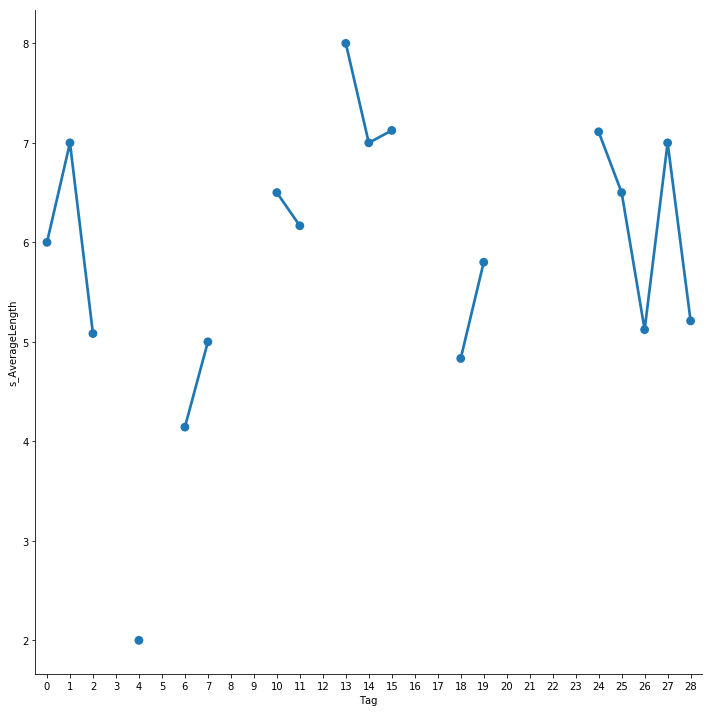

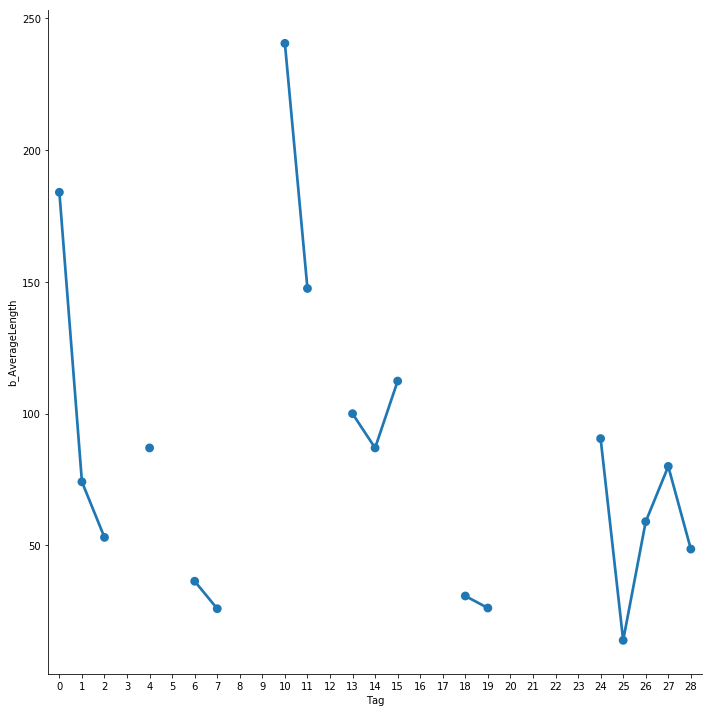

In [3]:
#create a dataframe with analysis of the length data
add_subject_length(train)
add_body_length(train)
b_length_df = get_body_average_length(train)
s_length_df = get_subject_average_length(train)


# factor plot the length versus sentiment for both body length and subject length
sns.factorplot(x='Tag',y='s_AverageLength', data=s_length_df, size = 10)
sns.factorplot(x='Tag',y='b_AverageLength', data=b_length_df, size = 10)




From the graph we can't really say much about the impact of the length of the bodies and the subjects on specific tags. 
For the subject, other than the 4 Tag: Holiday most of the other tags are too close to tell. 
Similarly the average length of the body of the email is highly variable. There are more distinct trends and we may try to use this later on.

We also probably have insufficient data in general and should rerun this with hundreds to thousands of more emails to see if these are useful features.


## Exploring Word Frequency, Standard Deviation, and Tags  

To learn more about how we could adjust the specific word list to remove the noise and less impactful words from our later bag of words algorithm. From our previous section it appears that the subject line won't show us much so we will look at the body data.
To generate a meaningful word list we will first create a histogram pandas df called word_df that will express the mean tag as the 'tag' column and the std of the tag as the 'std' column. To find the words with relationships that have a meaningful impact we will need to filter out results that are not extreme enough, not frequent enough, and have a low enough std to give a strong correlation. This method of grabbing the most impactful words will help us generate features for our models.

In [4]:
def word_df(df):
    """
    Create a dataframe documenting the frequency, standard deviation and 
    mean value of each unique word appears in the given dataframe  
    """
    word_dict = {}
    for index, row in df.iterrows():
        list =  createLowerWordList(row["body"])
        tag = row["Tag"]
        
        for word in list:
            if word in word_dict:
                word_dict[word][0] += 1
                word_dict[word][1].append(tag)
            else:
                word_dict[word] = [1, [tag]]
    # reformat the word dictionary to be inputable by pandas
    word_dict_keys = []
    word_dict_values = []
    for i in word_dict.keys():
        word_dict_keys.append(i)
    for i in word_dict.values():
        word_dict_values.append(i)
    formatted_word_dict = {'Word': word_dict_keys, 'Frequency-Tag': word_dict_values};
    print(formatted_word_dict)
    word_df = pd.DataFrame(formatted_word_dict)
    print(word_df)
    
    #using nicer list method + columns, should work something wrong with python3 or libraries version
    #formatted_word_dict = {'keys': [word_dict.keys()], 'values': [word_dict.values()]};
    #word_df = pd.DataFrame(data = formatted_word_dict, columns=["Word", "Frequency-Tag"])
    
    word_df['Frequency'] = word_df['Frequency-Tag'].apply(lambda x: x[0])
    word_df['Tag'] = word_df['Frequency-Tag'].apply(lambda x: np.mean(x[1]))
    word_df['Std'] = word_df['Frequency-Tag'].apply(lambda x: float(np.std(x[1])))
    return word_df.drop('Frequency-Tag', 1).dropna().sort_values(['Frequency'], ascending=False)

# generate a word dataframe fortrain dataset
train_word_df = word_df(train)

{'Word': ['increases', 'the', 'surface', 'area', 'of', 'top', 'your', 'shelf', '(sticks', 'out', 'front', 'and', 'back)', 'about', 'additional', 'height', "it's", 'like', 'a', 'sideways', 'box', 'that', 'slots', 'into', 'wh', 'shelves', 'has', 'wire', 'routing', 'holes', 'pretty', 'nice', 'i', 'shopbotted', 'it', '/', 'ply', 'have', 'cad', 'too', 'if', "you're", '-rowan', 'eom', '_______________________________________________', 'carpediem', 'mailing', 'list', 'carpediem@listsolinedu', 'https//listsolinedu/mailman/listinfo/carpediem', 'couple', 'friends', 'mine', 'are', 'looking', 'for', 'third', 'roommate', 'their', 'house', 'on', 'massave', 'is', 'minute', 'walk', 'to', 'central', 'square', '(right', 'across', 'from', "people's", 'republic', 'bar)', 'two', 'other', 'bedrooms', 'occupied', 'by', 'early', 's', 'women', 'who', 'really', 'wonderful', 'easy', 'live', 'with', '(and', 'maybe', 'cat)', "they're", 'someone', 'sign', 'yearlong', 'lease', 'starting', 'in', 'september', 'let', '

<bound method NDFrame.describe of                     Word  Frequency        Tag        Std
1                    the        318  15.786164   9.826075
65                    to        313  16.690096   9.688592
11                   and        307  15.293160   9.765260
4                     of        237  18.135021   9.444414
18                     a        236  18.911017   9.606921
102                  you        185  16.572973   9.970027
97                    in        154  15.623377  10.011083
55                   for        152  17.730263   9.706191
40                    if        120  16.691667  10.405764
62                    is        108  16.824074   9.919891
301                   be        106  11.443396  10.207360
32                     i        100  22.200000   7.989994
53                   are         98  16.867347  10.572044
34                    it         96  20.427083   9.246333
60                    on         92  14.891304  10.512370
87                  with         90  1

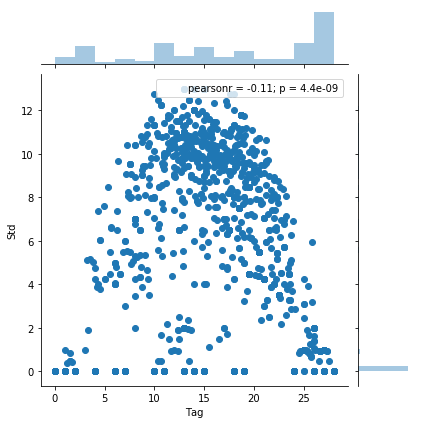

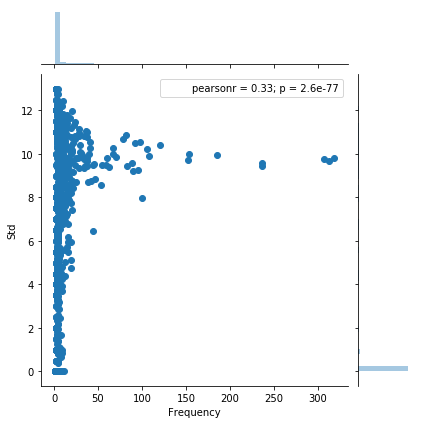

In [5]:
sns.jointplot(train_word_df['Tag'], train_word_df['Std'])
sns.jointplot(train_word_df['Frequency'], train_word_df['Std'])
train_word_df.describe

TypeError: 'function' object is not subscriptable

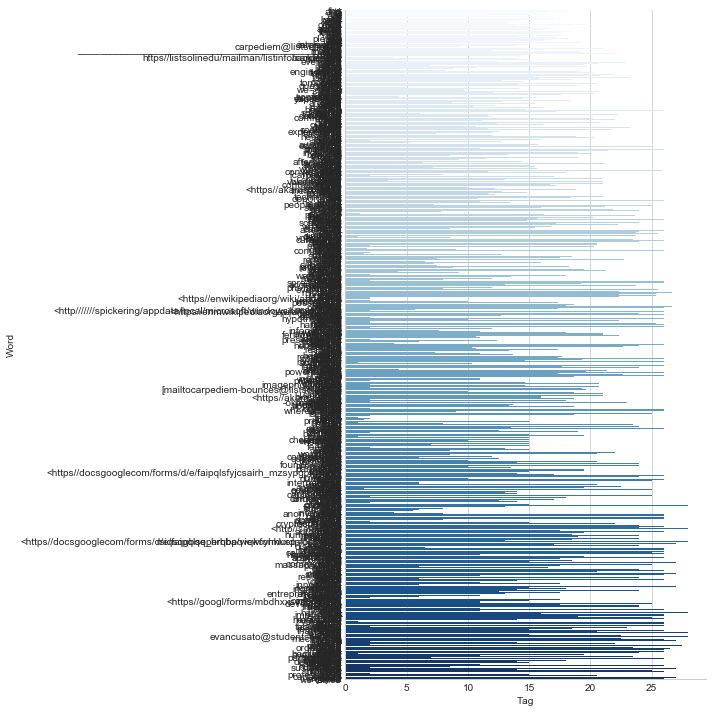

In [6]:
#From our current word list we lack the data to really grab words that correlate to a Tag. Also Tag's are arbitrarily asisgned.
sns.set_style("whitegrid")

updated_word_list = train_word_df[train_word_df['Frequency'] > 1]
sns.factorplot(x='Tag',y='Word', data=updated_word_list,kind="bar",palette="Blues",size=10,aspect=1,legend_out=False);
sns.jointplot(word_df['Tag'], word_df['Std']);

We clearly lack the amount of data in order to have the amount of words to meaningfully understand the words that are useful. In addition, trying to analyze the mean and std in this way doesn't work due to the fact that movie Tags and classifications are not ordered in any arbitrary order like sentiment analysis. Thus, none of the features attempted to be extracted here appear to be that useful.